In [1]:
#######Cluster Analysis##########

In [2]:
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt

In [3]:
DF  = pd.read_excel(r'C:\Users\320066422\Desktop\Python\Definitive Accts Information .xlsx', sheet_name = 'Definitive')

In [4]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7966 entries, 0 to 7965
Data columns (total 35 columns):
MP1                                       6721 non-null float64
GRID                                      6721 non-null float64
Definitive ID                             7966 non-null int64
Hospital Name                             7966 non-null object
Financial Date Date                       6005 non-null datetime64[ns]
Firm Type                                 7966 non-null object
Hospital Type                             7966 non-null object
Address                                   7966 non-null object
City                                      7966 non-null object
Region                                    7966 non-null object
State                                     7966 non-null object
Zip Code                                  7966 non-null int64
IDN                                       6080 non-null object
Ownership                                 7544 non-null object
IDN

In [5]:
#Replace space in column names with underscore
DF.columns = [x.replace(' ','_') for x in DF.columns]

In [6]:
#read and join tables 
MT  = pd.read_excel(r'C:\Users\320066422\Desktop\Toolbox\mapping table.xlsx', encoding = 'unicode_escape')

In [7]:
MT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85338 entries, 0 to 85337
Data columns (total 4 columns):
Golden record key           85336 non-null float64
SFDC Account Internal ID    85338 non-null object
DefinitiveHC ID             85338 non-null int64
MP1CustomerID               85338 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 2.6+ MB


In [8]:
rfm = pd.read_csv(r'C:\Users\320066422\Desktop\Requests\rfm2.csv',encoding = 'unicode_escape',dtype=str)

In [9]:
rfm.columns = [x.replace(' ','_') for x in rfm.columns]

In [10]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 6 columns):
Ship-to                      2774 non-null object
Ship-to_Name                 2774 non-null object
Monetary                     2774 non-null object
Recency                      2774 non-null object
Frequency                    2774 non-null object
Healthcare_Market_Segment    1826 non-null object
dtypes: object(6)
memory usage: 130.2+ KB


In [11]:
rfm['Ship-to']= rfm['Ship-to'].astype(int)

In [12]:
DR = pd.merge(rfm,MT['DefinitiveHC ID'],left_on = rfm['Ship-to'],right_on = MT['MP1CustomerID'],how = 'left')

In [13]:
DD = pd.merge(DR[['Monetary','Recency','Frequency']],DF,left_on = DR['DefinitiveHC ID'],right_on = DF['Definitive_ID'],how = 'left')

In [14]:
DD = DD.fillna(0)

In [15]:
features = DD[['Average_Length_of_Stay','#_of_Discharges','#_of_Staffed_Beds', 'Total_Patient_Revenue',
       'Net_Patient_Revenue', 'Total_Revenues', 'Total_Operating_Expenses',
       'Est._IT_Operating_Expense_Budget', 'Est._IT_Capital_Budget',
       'Capital_Expenditures', 'Payor_Mix:_Medicare_Days',
       'Payor_Mix:_Medicaid_Days', 'Payor_Mix:_Private/Self-Pay/Other_Days',
       'Case_Mix_Index', 'Medical_CMI', 'Surgical_CMI', 'CC/MCC_Rate', 'Buy_Power','Frequency','Recency']]

In [16]:
labels = DD['Monetary']

In [17]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [18]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [19]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [20]:
fi = pd.DataFrame({'feature': list(features.columns),
                   'importance': rf.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Display
fi


feature  importance
6                 Total_Operating_Expenses    0.172270
7         Est._IT_Operating_Expense_Budget    0.120588
18                               Frequency    0.112201
5                           Total_Revenues    0.098190
3                    Total_Patient_Revenue    0.066867
17                               Buy_Power    0.060753
19                                 Recency    0.041660
2                        #_of_Staffed_Beds    0.040089
9                     Capital_Expenditures    0.030629
1                          #_of_Discharges    0.030159
8                   Est._IT_Capital_Budget    0.028636
11                Payor_Mix:_Medicaid_Days    0.026691
0                   Average_Length_of_Stay    0.026686
10                Payor_Mix:_Medicare_Days    0.025229
12  Payor_Mix:_Private/Self-Pay/Other_Days    0.024104
15                            Surgical_CMI    0.022868
13                          Case_Mix_Index    0.020687
4                      Net_Patient_Revenue    0.019753
14                             Medical_CMI    0.016638
16                             CC/MCC_Rate    0.015301

In [21]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(test_labels, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(test_labels, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_labels, predictions)))

Mean Absolute Error: 544923.0426129325
Mean Squared Error: 1467696464553.57
Root Mean Squared Error: 1211485.2308441775


In [22]:
##Linear Regression##

In [23]:
import statsmodels.api as sm
import numpy as np

In [24]:
model = sm.OLS(train_labels.astype(float), train_features.astype(float)).fit()
predictions_regression = model.predict(train_features.astype(float))

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Monetary   R-squared (uncentered):                   0.621
Model:                            OLS   Adj. R-squared (uncentered):              0.619
Method:                 Least Squares   F-statistic:                              328.8
Date:                Thu, 25 Jun 2020   Prob (F-statistic):                        0.00
Time:                        19:21:34   Log-Likelihood:                         -64732.
No. Observations:                4040   AIC:                                  1.295e+05
Df Residuals:                    4020   BIC:                                  1.296e+05
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Average_Length_of_Stay                    3.8e+04   2.63e+04      1.445      0.148   -1.35e+04    8.95e+04
#_of_Discharges                          -20.9094      7.720     -2.709      0.007     -36.044      -5.774
#_of_Staffed_Beds                       1074.2834    363.746      2.953      0.003     361.140    1787.427
Total_Patient_Revenue                     -0.0003   4.68e-05     -6.269      0.000      -0.000      -0.000
Net_Patient_Revenue                       -0.0032      0.000     -6.537      0.000      -0.004      -0.002
Total_Revenues                             0.0039      0.001      6.837      0.000       0.003       0.005
Total_Operating_Expenses                  -0.0036      0.001     -2.778      0.005      -0.006      -0.001
Est._IT_Operating_Expense_Budget           0.1359      0.036      3.827      0.000       0.066       0.205
Est._IT_Capital_Budget                    -0.0409      0.006     -6.411      0.000      -0.053      -0.028
Capital_Expenditures                       0.0030      0.001      5.150      0.000       0.002       0.004
Payor_Mix:_Medicare_Days                1.792e+04   3.11e+05      0.058      0.954   -5.91e+05    6.27e+05
Payor_Mix:_Medicaid_Days                5.756e+05   4.84e+05      1.189      0.235   -3.74e+05    1.52e+06
Payor_Mix:_Private/Self-Pay/Other_Days  2.505e+05   3.49e+05      0.718      0.473   -4.33e+05    9.34e+05
Case_Mix_Index                          4.245e+05   1.83e+05      2.314      0.021    6.48e+04    7.84e+05
Medical_CMI                            -6.561e+05    3.3e+05     -1.986      0.047    -1.3e+06   -8267.227
Surgical_CMI                           -1.342e+04   7.17e+04     -0.187      0.851   -1.54e+05    1.27e+05
CC/MCC_Rate                             6.986e+05   3.69e+05      1.893      0.058   -2.49e+04    1.42e+06
Buy_Power                                  1.1040      0.079     13.906      0.000       0.948       1.260
Frequency                               1.046e+04    555.820     18.816      0.000    9368.440    1.15e+04
Recency                                -1.033e+05   1.09e+04     -9.444      0.000   -1.25e+05   -8.19e+04
==============================================================================
Omnibus:                     2263.595   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56860.338
Skew:                           2.170   Prob(JB):                         0.00
Kurtosis:                      20.859   Cond. No.                     4.52e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the co

In [26]:
train_labels = train_labels.astype(float)

In [27]:
from statsmodels.tools.eval_measures import rmse
rmse = rmse(train_labels, predictions_regression)
rmse

2199452.850765701

In [28]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [29]:
#################Cluster Analysis#####################
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn import preprocessing
from sklearn.metrics import silhouette_score

# Dimensionality reduction
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation

In [30]:
cluster_features = DD[['Average_Length_of_Stay','#_of_Discharges','#_of_Staffed_Beds', 'Total_Patient_Revenue',
       'Net_Patient_Revenue', 'Total_Revenues', 'Total_Operating_Expenses',
       'Est._IT_Operating_Expense_Budget', 'Est._IT_Capital_Budget',
       'Capital_Expenditures', 'Payor_Mix:_Medicare_Days',
       'Payor_Mix:_Medicaid_Days', 'Payor_Mix:_Private/Self-Pay/Other_Days',
       'Case_Mix_Index', 'Medical_CMI', 'Surgical_CMI', 'CC/MCC_Rate', 'Buy_Power','Frequency','Recency','PM_15-20_Revenue_with_Philips','Share_of_Wallet']]

In [31]:
def plot_corr(df):
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    
def plot_tsne(tnse_data, kmeans_labels):
    df_tsne = pd.DataFrame(tsne_data).rename({0: 'x', 1: 'y'}, axis=1)
    df_tsne['z'] = kmeans_labels
    sns.scatterplot(x=df_tsne.x, y=df_tsne.y, hue=df_tsne.z, palette="Set2")
    plt.show()
    
def prepare_pca(n_components, data, kmeans_labels):
    names = ['x', 'y', 'z']
    matrix = PCA(n_components=n_components).fit_transform(data)
    df_matrix = pd.DataFrame(matrix)
    df_matrix.rename({i:names[i] for i in range(n_components)}, axis=1, inplace=True)
    df_matrix['labels'] = kmeans_labels
    
    return df_matrix

def prepare_tsne(n_components, data, kmeans_labels):
    names = ['x', 'y', 'z']
    matrix = TSNE(n_components=n_components).fit_transform(data)
    df_matrix = pd.DataFrame(matrix)
    df_matrix.rename({i:names[i] for i in range(n_components)}, axis=1, inplace=True)
    df_matrix['labels'] = kmeans_labels
    
    return df_matrix

def plot_3d(df, name='labels'):
    iris = px.data.iris()
    fig = px.scatter_3d(df, x='x', y='y', z='z',
                  color=name, opacity=0.5)
    

    fig.update_traces(marker=dict(size=3))
    fig.show()
    
def plot_animation(df, label_column, name):
    def update(num):
        ax.view_init(200, num)

    N=360
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(tsne_3d_df['x'], tsne_3d_df['y'], tsne_3d_df['z'], c=tsne_3d_df[label_column],
               s=6, depthshade=True, cmap='Paired')
    ax.set_zlim(-15, 25)
    ax.set_xlim(-20, 20)
    plt.tight_layout()
    ani = animation.FuncAnimation(fig, update, N, blit=False, interval=50)
    ani.save('{}.gif'.format(name), writer='imagemagick')
    plt.show()

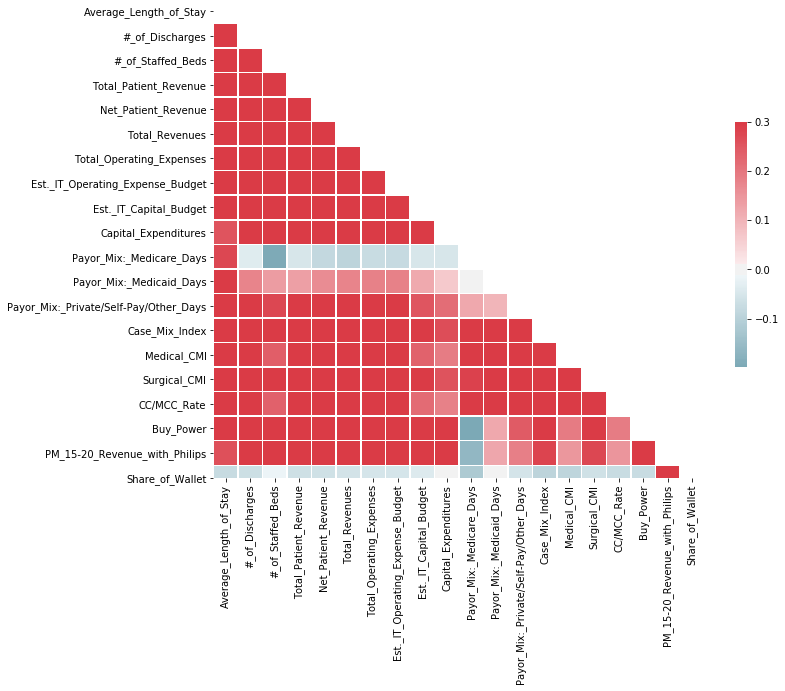

In [32]:
plot_corr(cluster_features)

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

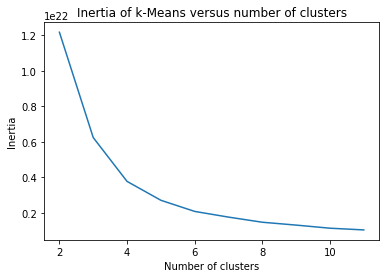

In [33]:
scores = [KMeans(n_clusters=i+2).fit(cluster_features).inertia_ for i in range(10)]
sns.lineplot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [34]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(cluster_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

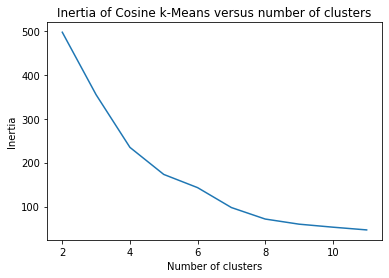

In [35]:
from sklearn import preprocessing
normalized_vectors = preprocessing.normalize(cluster_features)
scores = [KMeans(n_clusters=i+2).fit(normalized_vectors).inertia_  
          for i in range(10)]
sns.lineplot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of Cosine k-Means versus number of clusters")
plt.savefig("intertia_cosine_kmeans.jpg", dpi=300)

In [36]:
normalized_kmeans = KMeans(n_clusters=4)
normalized_kmeans.fit(normalized_vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
min_samples = cluster_features.shape[1]+1 #  Rule of thumb; number of dimensions D in the data set, as minPts ≥ D + 1
dbscan = DBSCAN(eps=3.5, min_samples=min_samples).fit(cluster_features)

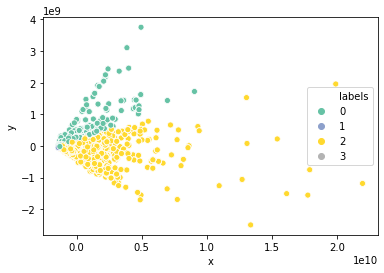

In [38]:
pca_df = prepare_pca(3, cluster_features, normalized_kmeans.labels_)
sns.scatterplot(x=pca_df.x, y=pca_df.y, hue=pca_df.labels, 
                palette="Set2")

In [39]:
pca_df = prepare_pca(3, cluster_features, normalized_kmeans.labels_)

tsne_3d_df = prepare_tsne(3, cluster_features, kmeans.labels_)

In [40]:
tsne_3d_df['normalized_kmeans'] = normalized_kmeans.labels_

In [41]:
tsne_3d_df['dbscan'] = [str(label) for label in dbscan.labels_]

In [42]:
tsne_3d_df

x          y          z  labels  normalized_kmeans dbscan
0    -19.100439  -8.741751   3.818646       2                  3     -1
1    -19.100449  -8.741761   3.818627       2                  3     -1
2     12.743984 -11.922673   9.309354       2                  1     -1
3     12.743984 -11.922670   9.309352       2                  1     -1
4     -5.390468  -9.231586   6.803397       2                  3     -1
...         ...        ...        ...     ...                ...    ...
5382  12.337038  14.032417  -8.969466       2                  2     -1
5383 -13.615408  -2.306684  -9.119617       0                  2     -1
5384  10.637384  13.094317 -11.491137       2                  2     -1
5385  -0.356773  14.149082  17.950115       1                  2     -1
5386  -3.966562 -18.636757  -3.583572       2                  0     -1

[5387 rows x 6 columns]

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


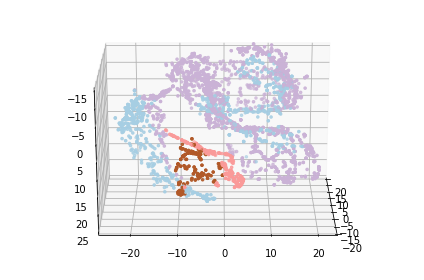

In [44]:
tsne_3d_df.dbscan = tsne_3d_df.dbscan.astype(int)
plot_animation(tsne_3d_df, 'normalized_kmeans', 'normalized_kmeans_new')

In [43]:
# Visualize cluster shapes in 3d.
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

cluster1=tsne_3d_df.loc[tsne_3d_df['labels'] == 0]
cluster2=tsne_3d_df.loc[tsne_3d_df['labels'] == 1]
cluster3=tsne_3d_df.loc[tsne_3d_df['labels'] == 2]
cluster4=tsne_3d_df.loc[tsne_3d_df['labels'] == 3]

scatter1 = dict(
    mode = "markers",
    name = "Cluster 1",
    type = "scatter3d",    
    x = cluster1.as_matrix()[:,0], y = cluster1.as_matrix()[:,1], z = cluster1.as_matrix()[:,2],
    marker = dict( size=2, color='green')
)
scatter2 = dict(
    mode = "markers",
    name = "Cluster 2",
    type = "scatter3d",    
    x = cluster2.as_matrix()[:,0], y = cluster2.as_matrix()[:,1], z = cluster2.as_matrix()[:,2],
    marker = dict( size=2, color='blue')
)
scatter3 = dict(
    mode = "markers",
    name = "Cluster 3",
    type = "scatter3d",    
    x = cluster3.as_matrix()[:,0], y = cluster3.as_matrix()[:,1], z = cluster3.as_matrix()[:,2],
    marker = dict( size=2, color='red')
)
scatter4 = dict(
    mode = "markers",
    name = "Cluster 4",
    type = "scatter3d",    
    x = cluster4.as_matrix()[:,0], y = cluster4.as_matrix()[:,1], z = cluster4.as_matrix()[:,2],
    marker = dict( size=2, color='yellow')
)
cluster1 = dict(
    alphahull = 5,
    name = "Cluster 1",
    opacity = .1,
    type = "mesh3d",    
    x = cluster1.as_matrix()[:,0], y = cluster1.as_matrix()[:,1], z = cluster1.as_matrix()[:,2],
    color='green', showscale = True
)
cluster2 = dict(
    alphahull = 5,
    name = "Cluster 2",
    opacity = .1,
    type = "mesh3d",    
    x = cluster2.as_matrix()[:,0], y = cluster2.as_matrix()[:,1], z = cluster2.as_matrix()[:,2],
    color='blue', showscale = True
)
cluster3 = dict(
    alphahull = 5,
    name = "Cluster 3",
    opacity = .1,
    type = "mesh3d",    
    x = cluster3.as_matrix()[:,0], y = cluster3.as_matrix()[:,1], z = cluster3.as_matrix()[:,2],
    color='red', showscale = True
)
cluster4 = dict(
    alphahull = 5,
    name = "Cluster 4",
    opacity = .1,
    type = "mesh3d",    
    x = cluster4.as_matrix()[:,0], y = cluster4.as_matrix()[:,1], z = cluster4.as_matrix()[:,2],
    color='yellow', showscale = True
)
layout = dict(
    title = 'Interactive Cluster Shapes in 3D',
    scene = dict(
        xaxis = dict( zeroline=True ),
        yaxis = dict( zeroline=True ),
        zaxis = dict( zeroline=True ),
    )
)
fig = dict( data=[scatter1, scatter2, scatter3, scatter4, cluster1, cluster2, cluster3, cluster4], layout=layout )
# Use py.iplot() for IPython notebook
plotly.offline.iplot(fig, filename='mesh3d_sample')

C:\Users\320066422\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

C:\Users\320066422\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

C:\Users\320066422\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

C:\Users\320066422\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:36: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

C:\Users\320066422\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:44: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.

C:\Users\320066422\AppData\Local\Continuum\anacond